# ***TWITTER SENTIMENT ANALYSIS***

###  Sentiment Analysis : 
It is application of ***Natural Language Processing (NLP)*** that builds systems that try to identify and extract the sentiment content or opinions behind a series of word.

Rule-based systems that perform sentiment analysis based on a set of manually crafted rules.

We use ***Rule Based Approch*** ,A textBlob library which is in python

### Step 1: Importing the important Libraries

In [39]:
 pip install twitter --user 
 pip install matplotlib --user 
 pip install numpy --user 
 pip install pandas --user
 pip install api --user
 pip install IPython --user
import sys
{sys.executable} -m pip install api

import twitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


- ***Importing necessary library*** 

1.**Twitter** is for collecting data from twitter.

2.**Numpy** is for do scientific calculation.

3.**Matplotlib** is for visualising the data.

3.**nltk** is natural language toolkit which contains various function and datasets.

 

### Step 2: Authenticating our python script

In [40]:
api =twitter.Api(consumer_key = "6wIbKc1r1gxBip6iIHFONAPmC",
                 consumer_secret = "tCVvZ73O3uoev0CDeWVTC81rlEXNZXqwwormg0y9uSFCFZfg1f",
                 access_token_key = "816662703582416896-tsI6gqNPYjHPWG4HLbBzjb9hy5EaxVr",
                 access_token_secret = "OS4LCkXQa0lfK3b1d7c8InhZuUBeCwBYs4FnOFvxXcs8f")

In [41]:
print("API Owner Details")
print(" ")
print(api.VerifyCredentials())

API Owner Details
 
{"created_at": "Wed Jan 04 15:08:56 +0000 2017", "default_profile": true, "followers_count": 7, "friends_count": 9, "id": 816662703582416896, "id_str": "816662703582416896", "location": "Vishakhapatnam, India", "name": "Jagadish Lakhini", "profile_background_color": "F5F8FA", "profile_banner_url": "https://pbs.twimg.com/profile_banners/816662703582416896/1520264593", "profile_image_url": "http://pbs.twimg.com/profile_images/970685673916260352/7ijE5nZ9_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/970685673916260352/7ijE5nZ9_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "jagadish312_"}


### Step 3: Extracting trending hashtags

In [42]:
locationTrending = api.GetTrendsWoeid('23424848', exclude=None)
trending =[]
[trending.append(trend.name) for trend in locationTrending]
print("Trending")
print(" ")
print(trending)

Trending
 
['#RIPTiktok', '#SocialMediaDay', '#BanEVM', '#tuesdayvibes', '#SwineFlu', 'Joonie', 'Paytm', 'NATO', 'DigitalAtmanirbhar WithRoposo', 'RoposoAaya TikTokGaya', 'श्री भूपेंद्र यादव', 'श्री हनुमान', 'Waghama', 'CamScanner', 'Chinese FDI', '#चीन_का_काल_मोदी', '#Sooryavanshi', '#COVAXIN', '#BazaarFtHimanshiKhurana', '#MausiJi_LaxmibaiKelkar', '#TajHotel', '#हूल_क्रांतिदिन1855', '#StepDownEPS', '#TSHighcourtRespond', '#HBDAllariNaresh', '#नुह_अलवर_खुनी_रोड_फोरलेन_करो', '#PMDoCBIEnquiryForSSR', '#HBDThirumuruganGandhi', '#DadabhaiNaoroji', '#Visakhapatnam', '#HondaCity', '#HBDShiyamJack', '#AamirKhan', '#AsteroidDay', '#SMLive', '#CSCBiharDay', '#HBDGnanavelRaja', '#Ask_BLACKPINK', '#happybirthdayavikagor', '#AsiManshi', '#दादाभाई_नौरोजी', '#unlock2guidelines', '#cscupdiwas']


### Step 4: Extracting the tweets from twitter for a specific hashtag

In the **createTestData** is a function which take input from user and collect the tweets from twitter and store in variable name ***data***.

In [43]:
def createTestData(search):
    try:
        fetchData = api.GetSearch(search,count=100)
        print("We extract "+str(len(fetchData))+ " for "+search)
        return [{"text":status.text} for status in fetchData]
        #print("In try")
    except:
        print("Data is not Extracted")
        return None
search_string = input("Enter the term u want to search")
data =createTestData(search_string)
data

Enter the term u want to search#COVAXIN
We extract 100 for #COVAXIN


[{'text': "India's first #COVID19 vaccine candidate, #COVAXIN, gets approval for human trials; it has been jointly developed b… https://t.co/dazz7CqpsD"},
 {'text': '#BREAKING | இந்தியாவில் கொரோனாவை தடுக்க முதல் தடுப்பூசிக்கு ஒப்புதல்! \n\nhttps://t.co/5wMBD3FLqB | #Covid19 |… https://t.co/HmP7KFPFQY'},
 {'text': 'Welcome news: Human trials to begin immediately for India’s 1st COVID-19 Vaccine - #COVAXIN™ developed by… https://t.co/9uYWtcyvV6'},
 {'text': 'RT @sandhyafernez: #Update \n\nIndia’s first #Covid_19 vaccine candidate #COVAXIN developed by @BharatBiotech gets DCGI approval; human trial…'},
 {'text': "RT @BharatBiotech: COVAXIN™, India's 1st indigenous Covid-19 vaccine, developed by Bharat Biotech successfully enters human trials.\n\n @ICMR…"},
 {'text': 'Hopefully #COVAXIN is not the same!\n#Corona #Covid_19'},
 {'text': 'RT @polimernews: இந்தியாவின் முதல் கொரோனா தடுப்பு மருந்து..  மனிதர்களுக்கு பரிசோதிக்க அனுமதி..! #India | #CoronaVaccine | #COVAXIN | #Covid…'},
 {'text': 'A

### Step 5: Preprocessing the data

#### - Data cleaning
- The tweets from twitter data may contains *usernames,hashtag,word in other language ,extra whitespace,stopwords(like is,am,you,the...)* ,so we have to remove all of these words.

- tweets may contains the simliar words such as (like,likes ).both are same words(***stemming words***)

In [37]:
import re
import nltk 
from nltk import sent_tokenize
from string import punctuation 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
ensw=set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
df=[]
for i in range(len(data)):
    df.append(data[i].get("text"))    

type(df[0])
for i in range(len(df)):    
    df[i]=df[i].lower() 
    df[i]=re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', df[i])
    df[i] = re.sub('@[^\s]+', '', df[i]) # remove usernames
    df[i] = re.sub(r'#([^\s]+)', r'\1', df[i]) # remove the # in #hashtag
    df[i]= re.sub('[^a-zA-Z]',' ',df[i]) #remove words then English
    df[i]= re.sub(r'\b\w{1,2}\b', '', df[i]) # Remove words with 2 or fewer letters
    df[i] = re.sub(r'\s\s+', ' ', df[i]) # Remove whitespace (including new line characters)


## Step 6:  Analysing the tweets

- through BarPlot of most frequent tweets

In [31]:
para=[]
for i in range(len(df)):
    para+=word_tokenize(df[i])
filterTweets=([ i for i in para if i not in ensw])
tweets=' '
tweets = tweets.join(filterTweets)
print('There are',len(tweets),'words in the all tweets')


There are 704 words in the all tweets


In [32]:
from collections import Counter
wordfreq =Counter(filterTweets)


<Figure size 1080x360 with 0 Axes>

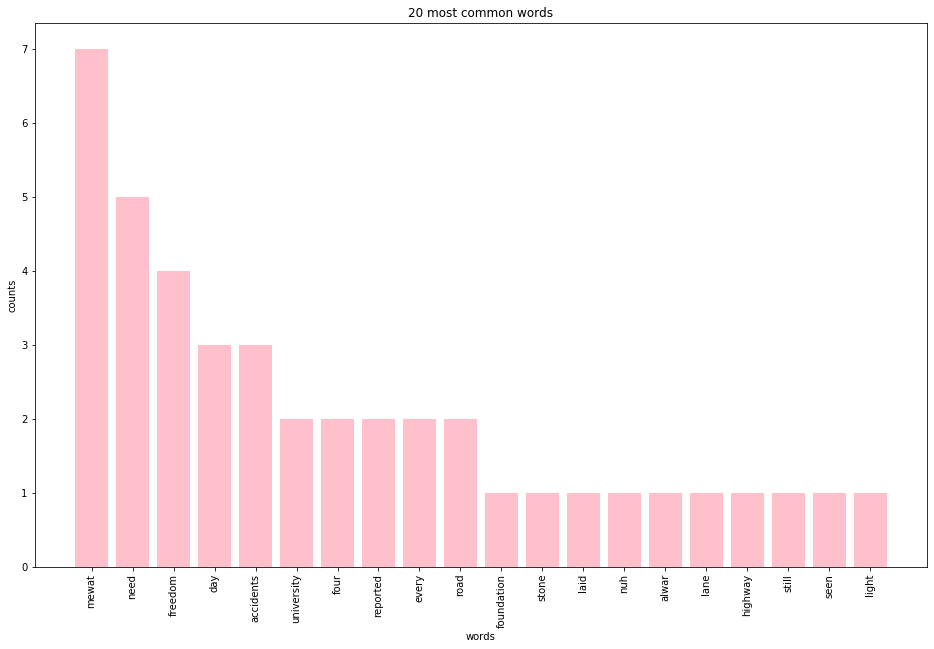

In [33]:
plt.figure(figsize=(15,5))
l=[]
co=[]
for letter, count in wordfreq.most_common(20): 
    l.append(letter)
    co.append(count)
x_pos = np.arange(len(l)) 
plt.figure(figsize=(16, 10))
plt.bar(x_pos, co,align='center',color='pink')
plt.xticks(x_pos, l, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.title('20 most common words')
plt.show()

## Classification of tweets using TextBlob

In [34]:
from textblob import TextBlob

def sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
pos_count=0
neg_count=0
neu_count=0
for i in df:
    if(sentiment(i)>0):
        pos_count+=1
    elif sentiment(i)==0:
        neu_count+=1
    else:
        neg_count+=1
        
total = pos_count+neu_count+neg_count
pos = (pos_count/total)*100
neg = (neg_count/total)*100
neu = (neu_count/total)*100

print("Percentage of Positive Tweets ",pos,"%")
print("Percentage of Negative Tweets ",neg,"%")
print("Percentage of Neutral Tweets ",neu,"%")
        
    

Percentage of Positive Tweets  5.0 %
Percentage of Negative Tweets  1.0 %
Percentage of Neutral Tweets  94.0 %


## Step 12: Visualization of Sentiments

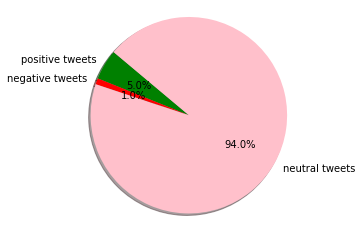

In [35]:
import matplotlib.pyplot as plt
labels = 'positive tweets','negative tweets', 'neutral tweets'
sizes = [pos_count,neg_count,neu_count]
colors = ['green', 'red','pink']
# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()